# Use sdk to get experiment IDs and CCF injection coords

In [1]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import numpy as np

mcc = MouseConnectivityCache()

# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print("%d total experiments" % len(all_experiments))

2918 total experiments


In [11]:
expIDs = np.array(all_experiments['id'])
ccfCoords = np.array(all_experiments['injection-coordinates'])
inj_structures = np.array(all_experiments['injection-structures'])

# Use api to get bregma injection coords (I don't see how to get both of them from api or sdk individually...)

In [78]:
from xml.dom.minidom import parse, parseString
import urllib

bregmaCoords = []
angle = []
registrationPoint = []
for expID in expIDs:
    url = r'http://api.brain-map.org/api/v2/data/query.xml?criteria=model::SectionDataSet,rma::criteria,[id$eq' + str(expID) + '],rma::include,specimen(stereotaxic_injections(primary_injection_structure,structures,stereotaxic_injection_coordinates)),equalization,sub_images,rma::options[order$eq%27sub_images.section_number$asc%27]'
    xmlstring = urllib.urlopen(url).read()
    xml = parseString(xmlstring)
    
    angle.append(float(xml.getElementsByTagName('angle')[0].childNodes[0].nodeValue))
    registrationPoint.append(xml.getElementsByTagName('registration-point')[0].childNodes[0].nodeValue)
    
    #looks like there were injections at multiple depths for some experiments--there will be
    #an ap, dv, ml coordinate for each one
    ap = xml.getElementsByTagName('coordinates-ap')
    apCoords = [float(a.childNodes[0].nodeValue) for a in ap]
    dv = xml.getElementsByTagName('coordinates-dv')
    dvCoords = [float(d.childNodes[0].nodeValue) for d in dv]
    ml = xml.getElementsByTagName('coordinates-ml')
    mlCoords = [float(m.childNodes[0].nodeValue) for m in ml]
    
    bregmaCoords.append([apCoords, dvCoords, mlCoords])
    

In [79]:
#Example: get the bregma coordinates for the third experiment (for which there were two injections)
print(bregmaCoords[2])

#and the CCF coords (only one injection location... maybe just average over the multiple injections?)
print(ccfCoords[2])


[[2.1, 2.1], [0.4, 1.0], [2.4, 2.4]]
[2460, 2960, 8170]


In [106]:
badBregma = (np.array([b[0][0] for b in bregmaCoords])==0)&(np.array([b[2][0] for b in bregmaCoords])==0)
np.sum(badBregma)

321

<IPython.core.display.Javascript object>


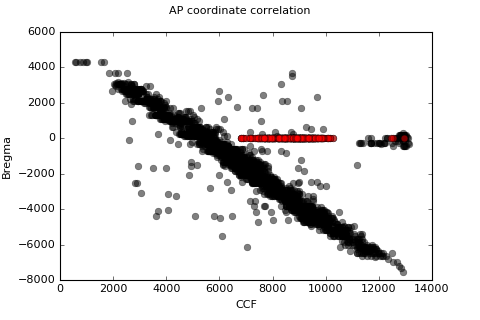

In [105]:
from matplotlib import pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
fig.suptitle('AP coordinate correlation')
ax.plot(np.array([c[0] for c in ccfCoords]), 1000*np.array([b[0][0] for b in bregmaCoords]), 'ko', alpha=0.5)
ax.plot(np.array([c[0] for c in ccfCoords])[badBregma], np.array([b[0][0] for b in bregmaCoords])[badBregma], 'ro', alpha=0.5)
ax.set_xlabel('CCF')
ax.set_ylabel('Bregma')

<IPython.core.display.Javascript object>


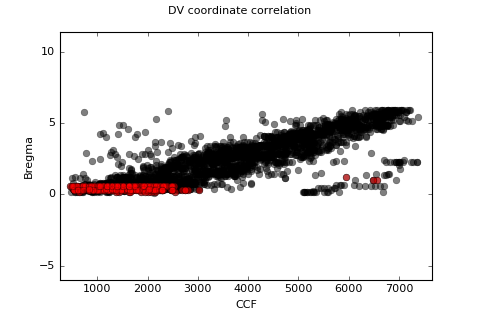

In [102]:
fig, ax = plt.subplots()
fig.suptitle('DV coordinate correlation')
ax.plot(np.array([c[1] for c in ccfCoords]), np.array([b[1][0] for b in bregmaCoords]), 'ko', alpha=0.5)
ax.plot(np.array([c[1] for c in ccfCoords])[badBregma], np.array([b[1][0] for b in bregmaCoords])[badBregma], 'ro', alpha=0.5)

ax.set_xlabel('CCF')
ax.set_ylabel('Bregma')

<IPython.core.display.Javascript object>


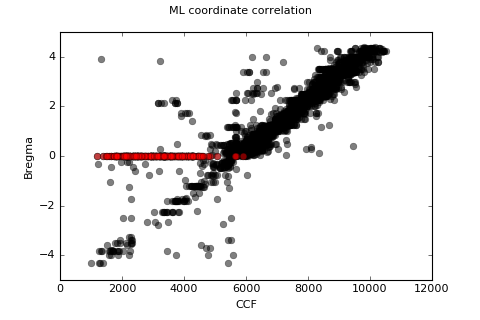

In [101]:
fig, ax = plt.subplots()
fig.suptitle('ML coordinate correlation')
ax.plot(np.array([c[2] for c in ccfCoords]), np.array([b[2][0] for b in bregmaCoords]), 'ko', alpha=0.5)
ax.plot(np.array([c[2] for c in ccfCoords])[badBregma], np.array([b[2][0] for b in bregmaCoords])[badBregma], 'ro', alpha=0.5)
ax.set_xlabel('CCF')
ax.set_ylabel('Bregma')